

```
# Dit is opgemaakt als code
```

# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [2]:
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
from pandas.core.algorithms import value_counts     #Extra import voor value_counts xx

In [9]:
android=pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/android_persistence_cpu.csv',";")
android.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

In [12]:
print(android.DataSize)
print('*'*50)
print(android.PersistenceType)

0      Small
1      Small
2      Small
3      Small
4      Small
       ...  
295    Large
296    Large
297    Large
298    Large
299    Large
Name: DataSize, Length: 300, dtype: object
**************************************************
0      Sharedpreferences
1      Sharedpreferences
2      Sharedpreferences
3      Sharedpreferences
4      Sharedpreferences
             ...        
295                Realm
296                Realm
297                Realm
298                Realm
299                Realm
Name: PersistenceType, Length: 300, dtype: object


How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

In [17]:
android.groupby('PersistenceType')['DataSize'].value_counts()

PersistenceType    DataSize
GreenDAO           Large       30
                   Medium      30
                   Small       30
Realm              Large       30
                   Medium      30
                   Small       30
SQLLite            Large       30
                   Medium      30
                   Small       30
Sharedpreferences  Small       30
Name: DataSize, dtype: int64

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

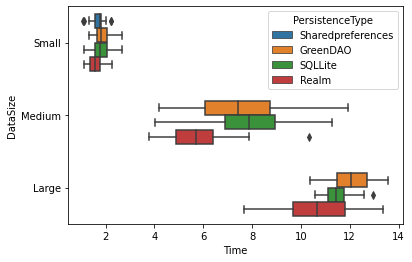

In [26]:
sns.boxplot(data=android,x='Time',y='DataSize',hue='PersistenceType')

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](https://github.com/HoGentTIN/dsai-en-labs/blob/main/2-analysis-1-var/img/persistence-density.png?raw=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

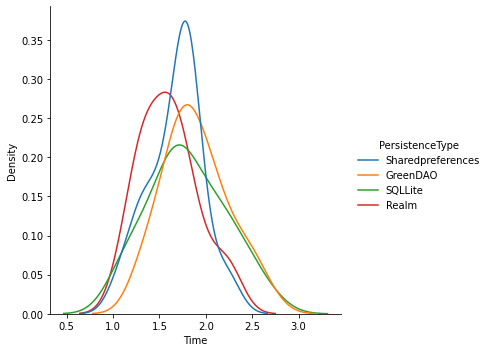

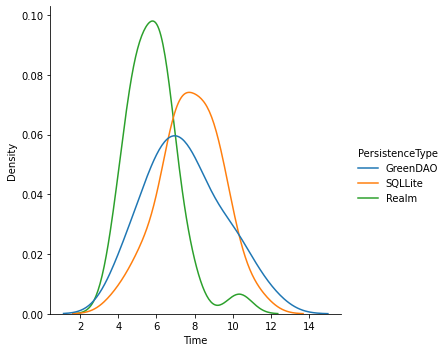

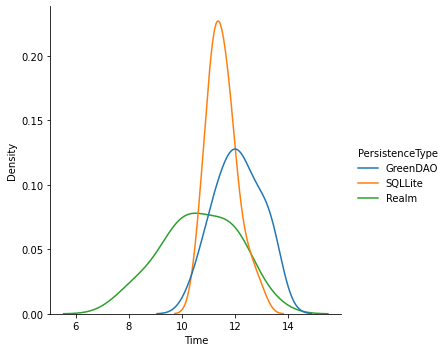

In [59]:
from operator import length_hint
figure, axis = plt.subplots(3,0)
sns.displot(data=android[(android.DataSize=='Small')], hue='PersistenceType',x='Time',kind='kde',ax=axis[0])

sns.displot(data=android[(android.DataSize=='Medium')], hue='PersistenceType',x='Time',kind='kde',ax=axis[1])

sns.displot(data=android[(android.DataSize=='Large')], hue='PersistenceType',x='Time',kind='kde',ax=axis[2])



Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [94]:

print(android.Time.describe()[['mean','std']])
print(android.groupby('DataSize')['Time'].describe()[['mean','std']])
print(android.groupby('PersistenceType')['Time'].describe()[['mean','std']])




mean    6.230833
std     4.229599
Name: Time, dtype: float64
               mean       std
DataSize                     
Large     11.425667  1.163785
Medium     7.022000  1.864335
Small      1.741333  0.358625
                       mean       std
PersistenceType                      
GreenDAO           7.152667  4.385917
Realm              6.022889  3.884175
SQLLite            7.036000  4.146336
Sharedpreferences  1.673667  0.285192


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
